In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import os, fnmatch
import MyFunctions as mf

### Load causal network coeffcients

In [2]:
parent_path = '/home/jmindlin/work_folders/Amon_Omon_recipe_allmodels_allmembers_additional_models_u850_sst_pr_tas_psl_20230529_080043'
preproc_path = parent_path+'/preproc'
ruta = preproc_path+'/multiple_regression_indices/tos_cp'
tos_cp_index = mf.cargo_datos_rd(ruta,'tos')
ruta = preproc_path+'/multiple_regression_indices/ua50_spv'
ua50_spv_index = mf.cargo_datos_rd(ruta,'ua')
ruta = preproc_path+'/multiple_regression_indices//ta'
ta_index = mf.cargo_datos_rd(ruta,'ta')
ruta = preproc_path+'/multiple_regression_indices/gw'
gw_index = mf.cargo_datos_rd(ruta,'tas')

In [3]:
time = gw_index['ACCESS-CM2']['EnsembleMean'].time
for model in gw_index.keys():
    gw_index[model]['EnsembleMean']['time'] = time 

time = ta_index['ACCESS-CM2']['EnsembleMean'].time
for model in gw_index.keys():
    ta_index[model]['EnsembleMean']['time'] = time 

time = ua50_spv_index['ACCESS-CM2']['EnsembleMean'].time
for model in gw_index.keys():
    ua50_spv_index[model]['EnsembleMean']['time'] = time
     
time = tos_cp_index['ACCESS-CM2']['EnsembleMean'].time
for model in gw_index.keys():
    tos_cp_index[model]['EnsembleMean']['time'] = time 

In [4]:
work_path =  '/home/jmindlin/work_folders/Amon_Omon_recipe_allmodels_allmembers_additional_models_u850_sst_pr_tas_psl_20230529_080043/work'
ruta = work_path+'/multiple_regression_indices/multiple_regresion/u850_1900_2022'
regression_tos_cp_on_jet = mf.cargo_regression_coefs(ruta,'tos_cp')
regression_ta_on_jet = mf.cargo_regression_coefs(ruta,'ta')
regression_spv_on_jet = mf.cargo_regression_coefs(ruta,'ua50_spv')
regression_gw_on_jet = mf.cargo_regression_coefs(ruta,'gw')
regression_clim_jet = mf.cargo_regression_coefs(ruta,'clim')

{'MCM-UA-1-0', 'CAS-ESM2-0', 'UKESM1-0-LL', 'CNRM-CM6-1', 'GISS-E2-1-G', 'CMCC-CM2-SR5', 'CESM2-WACCM', 'E3SM-1-0', 'MPI-ESM1-2-LR', 'MIROC-ES2L', 'CanESM5', 'FGOALS-g3', 'NESM3', 'IITM-ESM', 'NorESM2-LM', 'MIROC6', 'GISS-E2-1-H', 'INM-CM5-0', 'CAMS-CSM1-0', 'CESM2', 'TaiESM1', 'MPI-ESM1-2-HR', 'INM-CM4-8', 'HadGEM3-GC31-MM', 'ACCESS-ESM1-5', 'CIESM', 'IPSL-CM6A-LR', 'MRI-ESM2-0', 'HadGEM3-GC31-LL', 'FIO-ESM-2-0', 'CNRM-ESM2-1', 'CMCC-ESM2', 'KACE-1-0-G', 'ACCESS-CM2', 'EC-Earth3', 'BCC-CSM2-MR', 'NorESM2-MM'}
{'MCM-UA-1-0', 'CAS-ESM2-0', 'UKESM1-0-LL', 'CNRM-CM6-1', 'GISS-E2-1-G', 'CMCC-CM2-SR5', 'CESM2-WACCM', 'E3SM-1-0', 'MPI-ESM1-2-LR', 'MIROC-ES2L', 'CanESM5', 'FGOALS-g3', 'NESM3', 'IITM-ESM', 'NorESM2-LM', 'MIROC6', 'GISS-E2-1-H', 'INM-CM5-0', 'CAMS-CSM1-0', 'CESM2', 'TaiESM1', 'MPI-ESM1-2-HR', 'INM-CM4-8', 'HadGEM3-GC31-MM', 'ACCESS-ESM1-5', 'CIESM', 'IPSL-CM6A-LR', 'MRI-ESM2-0', 'HadGEM3-GC31-LL', 'FIO-ESM-2-0', 'CNRM-ESM2-1', 'CMCC-ESM2', 'KACE-1-0-G', 'ACCESS-CM2', 'EC-Earth3

In [5]:
mean_tos_cp_on_jet = [regression_tos_cp_on_jet[model]['EnsembleMean'] for model in regression_tos_cp_on_jet.keys()]
MEM = xr.concat(mean_tos_cp_on_jet,dim='model')
MEM_tos_cp_on_jet = MEM.mean(dim="model")
del MEM
mean_ta_on_jet = [regression_ta_on_jet[model]['EnsembleMean'] for model in regression_tos_cp_on_jet.keys()]
MEM = xr.concat(mean_ta_on_jet,dim='model')
MEM_ta_on_jet = MEM.mean(dim="model")
del MEM
mean_spv_on_jet = [regression_spv_on_jet[model]['EnsembleMean'] for model in regression_tos_cp_on_jet.keys()]
MEM = xr.concat(mean_spv_on_jet,dim='model')
MEM_spv_on_jet = MEM.mean(dim="model")
del MEM
mean_gw_on_jet = [regression_gw_on_jet[model]['EnsembleMean'] for model in regression_tos_cp_on_jet.keys()]
MEM = xr.concat(mean_gw_on_jet,dim='model')
MEM_gw_on_jet = MEM.mean(dim="model")
del MEM
mean_clim_jet = [regression_clim_jet[model]['EnsembleMean'] for model in regression_tos_cp_on_jet.keys()]
MEM = xr.concat(mean_clim_jet,dim='model')
MEM_clim_jet = MEM.mean(dim="model")
del MEM

In [6]:
multimodel_tos_cp = [regression_tos_cp_on_jet[m]['EnsembleMean'] for m in  regression_tos_cp_on_jet.keys()]
multimodel_tos_cp = xr.concat(multimodel_tos_cp,dim='model')

multimodel_ta = [regression_ta_on_jet[m]['EnsembleMean'] for m in  regression_ta_on_jet.keys()]
multimodel_ta = xr.concat(multimodel_ta,dim='model')

multimodel_spv = [regression_spv_on_jet[m]['EnsembleMean'] for m in  regression_spv_on_jet.keys()]
multimodel_spv = xr.concat(multimodel_spv,dim='model')

multimodel_gw = [regression_gw_on_jet[m]['EnsembleMean'] for m in  regression_gw_on_jet.keys()]
multimodel_gw = xr.concat(multimodel_gw,dim='model')

mean_driver_responses = {}; std_driver_responses = {};pval_responses = {}
mean_driver_responses['Global Warming'] = multimodel_gw.mean(dim="model")
mean_driver_responses['Tropical Warming'] = multimodel_ta.mean(dim="model")
mean_driver_responses['Central Pacific Warming'] = multimodel_tos_cp.mean(dim="model")
mean_driver_responses['Stratospheric Polar Vortex'] = multimodel_spv.mean(dim="model")
std_driver_responses['Global Warming'] = multimodel_gw.std(dim="model")
std_driver_responses['Tropical Warming'] = multimodel_ta.std(dim="model")
std_driver_responses['Central Pacific Warming'] = multimodel_tos_cp.std(dim="model")
std_driver_responses['Stratospheric Polar Vortex'] = multimodel_spv.std(dim="model")

In [7]:
ruta = work_path+'/multiple_regression_indices/multiple_regresion/across_model_regression_historical/ua/regression_coefficients.nc'
ua_coefficients = xr.open_dataset(ruta)
MEM_tos_cp_on_jet = ua_coefficients.tos_cp
MEM_ta_on_jet = ua_coefficients.ta
MEM_gw_on_jet = ua_coefficients.gw
MEM_spv_on_jet = ua_coefficients.ua50_spv

In [8]:
plt.close('all')
eesc_ts = pd.read_csv(parent_path+'/GW_EESC_polar_ozoneloss.csv')

dic_coef_ta = mf.regression_driver_gw(ta_index,gw_index)
coef_ta_mean = [dic_coef_ta[model]['coef'][0] for  model in dic_coef_ta.keys()]
ta_mean = np.mean(np.array(coef_ta_mean))
coef_ta_gw = [dic_coef_ta[model]['coef'][1] for  model in dic_coef_ta.keys() if model != 'GISS-E2-1-G']
coef_ta_gw = np.array(coef_ta_gw)
ta_ts_values = [np.mean(coef_ta_gw) + 1.28*np.std(coef_ta_gw),np.mean(coef_ta_gw) - 1.28*np.std(coef_ta_gw)]

plt.close('all')
dic_coef_tos_cp = mf.regression_driver_gw(tos_cp_index,gw_index)
coef_tos_mean = [dic_coef_tos_cp[model]['coef'][0] for  model in dic_coef_tos_cp.keys()]
tos_mean = np.mean(np.array(coef_tos_mean))
coef_tos_gw = [dic_coef_tos_cp[model]['coef'][1] for  model in dic_coef_tos_cp.keys() if model != 'GISS-E2-1-G']
coef_tos_gw = np.array(coef_tos_gw)
tos_ts_values = [np.mean(coef_tos_gw) + 1.28*np.std(coef_tos_gw),np.mean(coef_tos_gw) - 1.28*np.std(coef_tos_gw)]

plt.close('all')
dic_coef_spv = mf.regression_driver_eesc_gw(ua50_spv_index,gw_index,eesc_ts)
coef_spv_gw = [dic_coef_spv[model]['coef'][2] for  model in dic_coef_spv.keys() if model != 'GISS-E2-1-G']
coef_spv_eesc = [dic_coef_spv[model]['coef'][1] for  model in dic_coef_spv.keys() if model != 'GISS-E2-1-G']
coef_spv_order = np.array([dic_coef_spv[model]['coef'][0] for  model in dic_coef_spv.keys() if model != 'GISS-E2-1-G'])
coef_spv_gw = np.array(coef_spv_gw)
spv_ts_values = [np.mean(coef_spv_gw) + 1.28*np.std(coef_spv_gw),np.mean(coef_spv_gw) - 1.28*np.std(coef_spv_gw),np.mean(coef_spv_eesc)-np.std(coef_spv_eesc),np.mean(coef_spv_order)]

std_coef_ta = []
for model in ta_index.keys():
    members = [np.std(mf.detrend(ta_index[model]['Members'][i].sel(time=slice('1950','2018')).values)) for i in range(len(ta_index[model]['Members']))]
    members = np.array(members)
    std_coef_ta.append(np.std(members))
    
std_coef_tos_cp = []
for model in tos_cp_index.keys():
    members = [np.std(mf.detrend(tos_cp_index[model]['Members'][i].sel(time=slice('1950','2018')).values)) for i in range(len(tos_cp_index[model]['Members']))]
    members = np.array(members)
    std_coef_tos_cp.append(np.std(members))
    
std_coef_spv = []
for model in ua50_spv_index.keys():
    members = [np.std(mf.detrend(ua50_spv_index[model]['Members'][i].sel(time=slice('1950','2018')).values)) for i in range(len(ua50_spv_index[model]['Members']))]
    members = np.array(members)
    std_coef_spv.append(np.std(members))

/home/jmindlin/work_folders/EDJ_causal_network/MyFunctions.py:211: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  eesc_ts['EESC_polar'][i] = eesc_ts['EESC_polar'][8]
/home/jmindlin/work_folders/EDJ_causal_network/MyFunctions.py:211: SettingWi

In [10]:
#Storylines
multimodel_ensemble = [mf.clim_anom(gw_index[model]['EnsembleMean']) for model in gw_index.keys() if model != "GISS-E2-1-G"]
gw_multimodel_ensemble = xr.concat(multimodel_ensemble,dim='model')
gw_multimodel_ensemble_mean = gw_multimodel_ensemble.mean(dim='model')
gw_multimodel_ensemble_std = gw_multimodel_ensemble.std(dim='model')

high_GW = gw_multimodel_ensemble_mean-1.28*gw_multimodel_ensemble_std
low_GW = gw_multimodel_ensemble_mean+1.28*gw_multimodel_ensemble_std


0
1
2


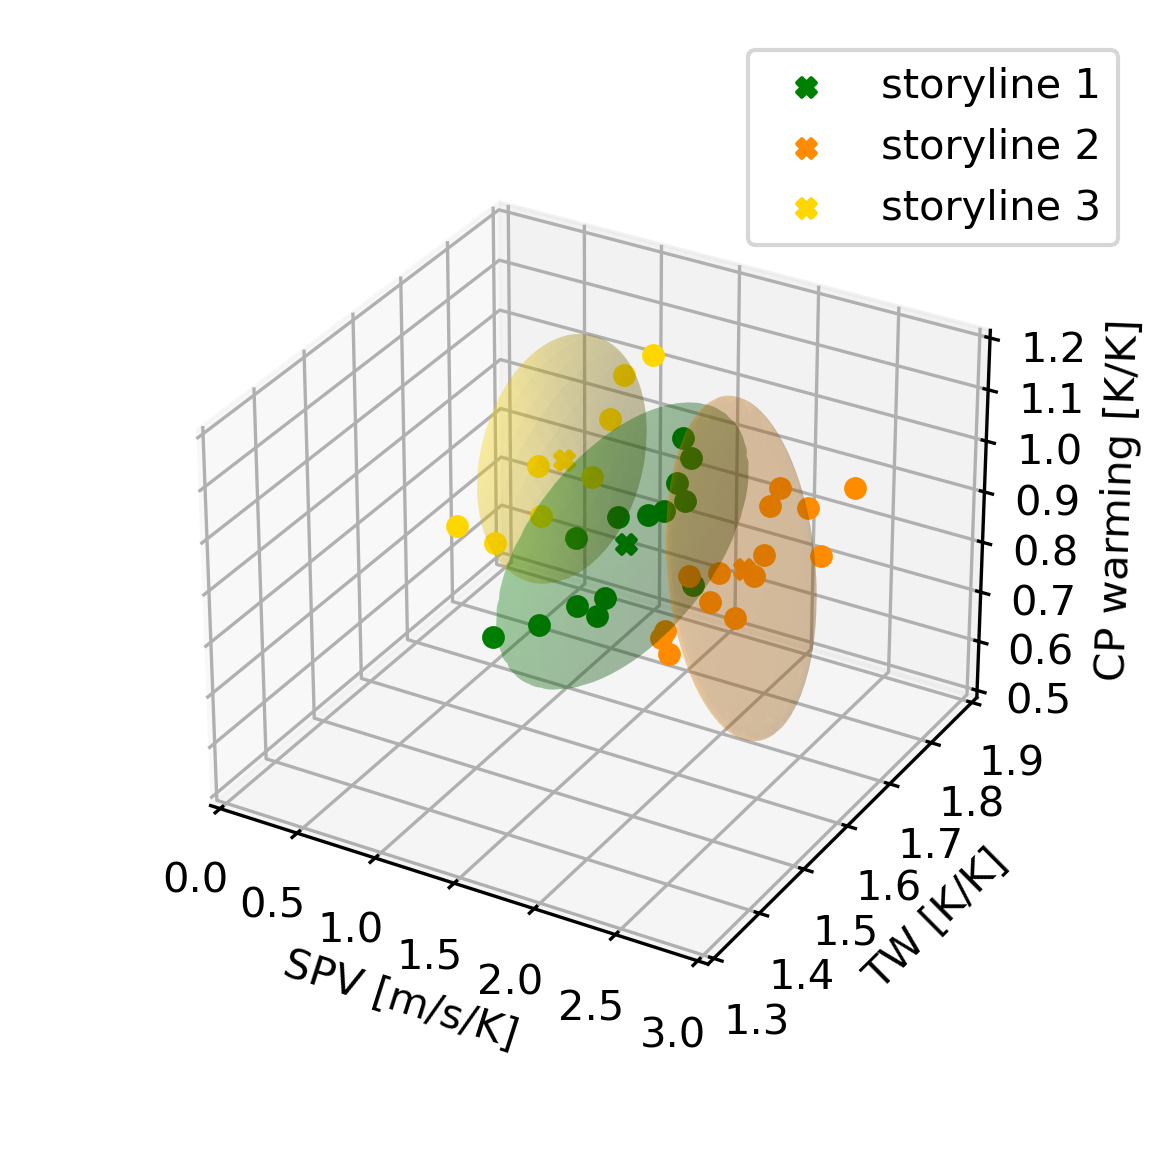

In [15]:
from sklearn import mixture
X = np.array([coef_spv_gw,coef_ta_gw,coef_tos_gw])
gm = mixture.GaussianMixture(n_components=3,covariance_type='full',random_state=0).fit(X.T)
mf.plot_results(X.T,gm.predict(X.T),gm.means_,gm.precisions_, 0, "Gaussian Mixture")

### Test causal network

In [16]:
import os
path_era = parent_path+'/ERA5'
listOfFiles = os.listdir(path_era)
era5 = xr.open_dataset(path_era+'/era5.mon.mean_regrid.nc')
u_1979_2018 = era5.u.isel(lev=30)
u_1950_1978 = xr.open_dataset(path_era+'/ERA5_monthly_u_wind_n36_rename_regrid.nc').u.isel(plev=10)
u_1950_2018 = xr.concat([u_1950_1978,u_1979_2018],'time')
u_DJF = mf.seasonal_data2(u_1950_2018,'DJF')
u_1950_2018_DJF = u_DJF.rename({'year':'time'})
CLIM_jet = u_1950_2018_DJF.sel(time=slice('1950','1969')).mean(dim='time')


FileNotFoundError: [Errno 2] No such file or directory: '/home/jmindlin/work_folders/Amon_Omon_recipe_allmodels_allmembers_additional_models_u850_sst_pr_tas_psl_20230529_080043/ERA5/era5.mon.mean_regrid.nc'